Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 80)                3440      
                                                                 
 dense_3 (Dense)             (None, 30)                2430      
                                                                 
 dense_4 (Dense)             (None, 20)                620       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 6,511
Trainable params: 6,511
Non-trainable params: 0
_________________________________________________________________


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5716 - accuracy: 0.7184
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5579 - accuracy: 0.7250
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5547 - accuracy: 0.7281
Epoch 4/100
804/804 [==============================] - 1s 992us/step - loss: 0.5530 - accuracy: 0.7289
Epoch 5/100
757/804 [===========================>..] - ETA: 0s - loss: 0.5513 - accuracy: 0.7291
Epoch 5: saving model to checkpoints\weights.5.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5514 - accuracy: 0.7295
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.7297
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5498 - accuracy: 0.7304
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5501 - accuracy: 0.7302
Epoch 9/100
804/804 [==============================] 

773/804 [===========================>..] - ETA: 0s - loss: 0.5388 - accuracy: 0.7364
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5389 - accuracy: 0.7364
Epoch 66/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5391 - accuracy: 0.7352
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5388 - accuracy: 0.7361
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5389 - accuracy: 0.7372
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5388 - accuracy: 0.7363
Epoch 70/100
801/804 [============================>.] - ETA: 0s - loss: 0.5385 - accuracy: 0.7375
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5385 - accuracy: 0.7374
Epoch 71/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5387 - accuracy: 0.7355
Epoch 72/100
804/804 

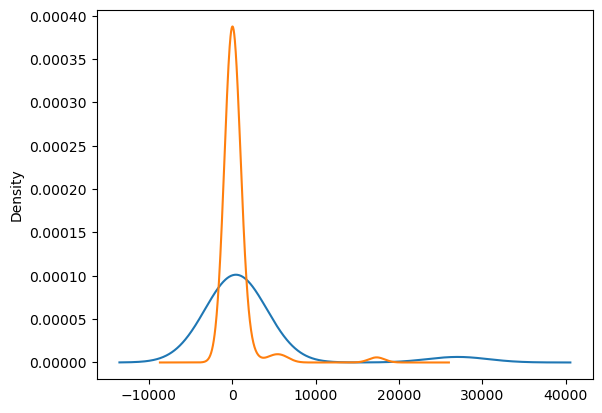

In [5]:
# Import our dependencies Dev 3 Step 2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()


# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HEAR Dev 1 Step 2
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df.head()


# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE Dev 1 Step 3
application_df.nunique()


# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE Dev 1 Step 4
app_count = application_df.APPLICATION_TYPE.value_counts()
app_count


# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE Dev 1 Step 5
app_count.plot.density()


# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE Dev 1 Step 
app_rep = list(app_count[app_count < 600].index)

# Replace in dataframe
for app in app_rep:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()


# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
class_count = application_df.CLASSIFICATION.value_counts()
class_count.head()


# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
class_count.plot.density()


# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(class_count[class_count < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()


# Generate our categorical variable lists
#  YOUR CODE GOES HERE Dev 1 Step 7
app_cat = list(application_df.dtypes[application_df.dtypes == "object"].index)
app_cat


# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE Dev 1 Step 8
encode_df = pd.DataFrame(enc.fit_transform(application_df[app_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(app_cat)
encode_df.head()


# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE Dev 1 Step 9 
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(labels=app_cat, axis=1)
application_df.head()


# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE Dev 1 Step 10
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values


# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE Dev 1 Step 11
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a StandardScaler instances Dev 1 Step 12
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE Dev 2 Step 1
number_input_features = len(X_train_scaled[0])

# Defining Neurons Layers
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()


# First hidden layer Dev 2 Step 3
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer Dev 2 Step 4
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer Dev 2 Step 5
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid")) 

# Check the structure of the model Dev 2 Step 6
nn.summary()


# Compile the model Dev 2 Step 7
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Import Checkpoint Dependencies Dev 2 Step 8
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path="checkpoints/weights.{epoch}.hdf5"

# Create callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq="epoch",
                              period=5)


# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])


# Evaluate the model using the test data Dev 2 Step 9
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               4300      
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 25)                1275      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5704 - accuracy: 0.7190
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5582 - accuracy: 0.7250
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5553 - accuracy: 0.7259
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.7285
Epoch 5/100
782/804 [============================>.] - ETA: 0s - loss: 0.5517 - accuracy: 0.7295
Epoch 5: saving model to checkpoints\weights.5.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5523 - accuracy: 0.7287
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5512 - accuracy: 0.7288
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5510 - accuracy: 0.7297
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5494 - accuracy: 0.7304
Epoch 9/100
804/804 [==============================] - 

804/804 [==============================] - 1s 1ms/step - loss: 0.5391 - accuracy: 0.7373
Epoch 65/100
754/804 [===========================>..] - ETA: 0s - loss: 0.5394 - accuracy: 0.7367
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5400 - accuracy: 0.7367
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5384 - accuracy: 0.7371
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5390 - accuracy: 0.7367
Epoch 68/100
804/804 [==============================] - 1s 963us/step - loss: 0.5387 - accuracy: 0.7372
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5391 - accuracy: 0.7358
Epoch 70/100
790/804 [============================>.] - ETA: 0s - loss: 0.5384 - accuracy: 0.7374
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5388 - accuracy: 0.7371
Epoch 71/100
804/80

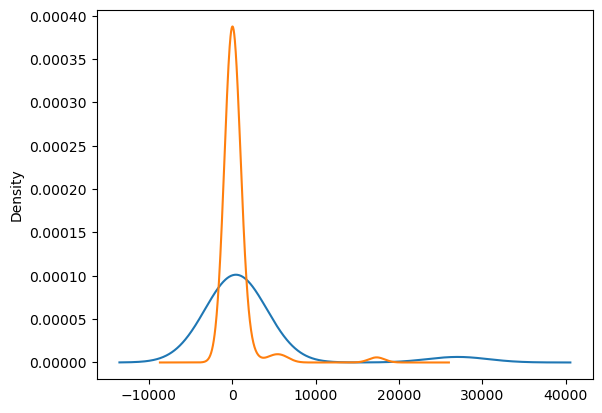

In [6]:
# Import our dependencies Dev 3 Step 2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()


# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HEAR Dev 1 Step 2
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df.head()


# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE Dev 1 Step 3
application_df.nunique()


# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE Dev 1 Step 4
app_count = application_df.APPLICATION_TYPE.value_counts()
app_count


# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE Dev 1 Step 5
app_count.plot.density()


# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE Dev 1 Step 
app_rep = list(app_count[app_count < 600].index)

# Replace in dataframe
for app in app_rep:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()


# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
class_count = application_df.CLASSIFICATION.value_counts()
class_count.head()


# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
class_count.plot.density()


# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(class_count[class_count < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()


# Generate our categorical variable lists
#  YOUR CODE GOES HERE Dev 1 Step 7
app_cat = list(application_df.dtypes[application_df.dtypes == "object"].index)
app_cat


# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE Dev 1 Step 8
encode_df = pd.DataFrame(enc.fit_transform(application_df[app_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(app_cat)
encode_df.head()


# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE Dev 1 Step 9 
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(labels=app_cat, axis=1)
application_df.head()


# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE Dev 1 Step 10
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values


# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE Dev 1 Step 11
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a StandardScaler instances Dev 1 Step 12
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE Dev 2 Step 1
number_input_features = len(X_train_scaled[0])

# Defining Neurons Layers
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 25

nn = tf.keras.models.Sequential()


# First hidden layer Dev 2 Step 3
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer Dev 2 Step 4
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer Dev 2 Step 5
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid")) 

# Check the structure of the model Dev 2 Step 6
nn.summary()


# Compile the model Dev 2 Step 7
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Import Checkpoint Dependencies Dev 2 Step 8
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path="checkpoints/weights.{epoch}.hdf5"

# Create callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq="epoch",
                              period=5)


# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])


# Evaluate the model using the test data Dev 2 Step 9
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 200)               8600      
                                                                 
 dense_31 (Dense)            (None, 150)               30150     
                                                                 
 dense_32 (Dense)            (None, 100)               15100     
                                                                 
 dense_33 (Dense)            (None, 1)                 101       
                                                                 
Total params: 53,951
Trainable params: 53,951
Non-trainable params: 0
_________________________________________________________________


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5706 - accuracy: 0.7206
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5581 - accuracy: 0.7269
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5541 - accuracy: 0.7268
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5513 - accuracy: 0.7297
Epoch 5/100
791/804 [============================>.] - ETA: 0s - loss: 0.5496 - accuracy: 0.7320
Epoch 5: saving model to checkpoints\weights.5.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5495 - accuracy: 0.7318
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5492 - accuracy: 0.7325
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5482 - accuracy: 0.7325
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5473 - accuracy: 0.7326
Epoch 9/100
804/804 [==============================] - 

795/804 [============================>.] - ETA: 0s - loss: 0.5357 - accuracy: 0.7389
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7389
Epoch 66/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5357 - accuracy: 0.7381
Epoch 67/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5353 - accuracy: 0.7392
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7397
Epoch 69/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5353 - accuracy: 0.7397
Epoch 70/100
778/804 [============================>.] - ETA: 0s - loss: 0.5352 - accuracy: 0.7375
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5356 - accuracy: 0.7369
Epoch 71/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5352 - accuracy: 0.7382
Epoch 72/100
804/804 

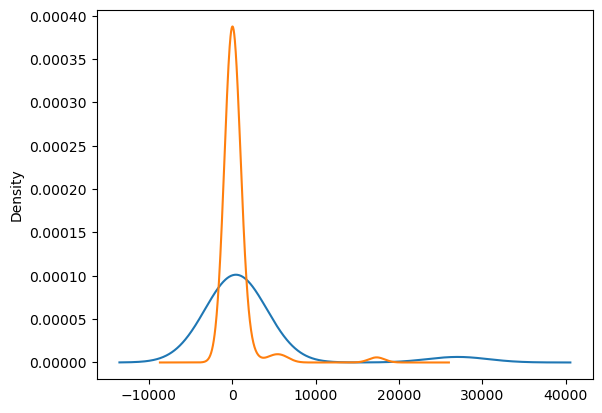

In [13]:
# Import our dependencies Dev 3 Step 2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()


# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HEAR Dev 1 Step 2
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df.head()


# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE Dev 1 Step 3
application_df.nunique()


# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE Dev 1 Step 4
app_count = application_df.APPLICATION_TYPE.value_counts()
app_count


# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE Dev 1 Step 5
app_count.plot.density()


# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE Dev 1 Step 
app_rep = list(app_count[app_count < 600].index)

# Replace in dataframe
for app in app_rep:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()


# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
class_count = application_df.CLASSIFICATION.value_counts()
class_count.head()


# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
class_count.plot.density()


# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(class_count[class_count < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()


# Generate our categorical variable lists
#  YOUR CODE GOES HERE Dev 1 Step 7
app_cat = list(application_df.dtypes[application_df.dtypes == "object"].index)
app_cat


# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE Dev 1 Step 8
encode_df = pd.DataFrame(enc.fit_transform(application_df[app_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(app_cat)
encode_df.head()


# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE Dev 1 Step 9 
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(labels=app_cat, axis=1)
application_df.head()


# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE Dev 1 Step 10
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values


# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE Dev 1 Step 11
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a StandardScaler instances Dev 1 Step 12
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE Dev 2 Step 1
number_input_features = len(X_train_scaled[0])

# Defining Neurons Layers
hidden_nodes_layer1 = 200
hidden_nodes_layer2 = 150
hidden_nodes_layer3 = 100

nn = tf.keras.models.Sequential()


# First hidden layer Dev 2 Step 3
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer Dev 2 Step 4
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer Dev 2 Step 5
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid")) 

# Check the structure of the model Dev 2 Step 6
nn.summary()


# Compile the model Dev 2 Step 7
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Import Checkpoint Dependencies Dev 2 Step 8
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path="checkpoints/weights.{epoch}.hdf5"

# Create callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq="epoch",
                              period=5)


# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])


# Evaluate the model using the test data Dev 2 Step 9
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")